In [1]:
import tensorflow as tf

In [2]:
mnist=tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test)=mnist.load_data()
x_train, x_test=x_train/255.0, x_test/255.0
print(x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [6]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
r=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 0.2964 - accuracy: 0.9145 - val_loss: 0.1413 - val_accuracy: 0.9582
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1476 - accuracy: 0.9565 - val_loss: 0.1131 - val_accuracy: 0.9650
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1088 - accuracy: 0.9678 - val_loss: 0.0906 - val_accuracy: 0.9711
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0905 - accuracy: 0.9724 - val_loss: 0.0788 - val_accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0750 - accuracy: 0.9762 - val_loss: 0.0760 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0683 - accuracy: 0.9782 - val_loss: 0.0762 - val_accuracy: 0.9774
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0610 - accuracy: 0.9804 - val_loss: 0.0704 - val_accuracy

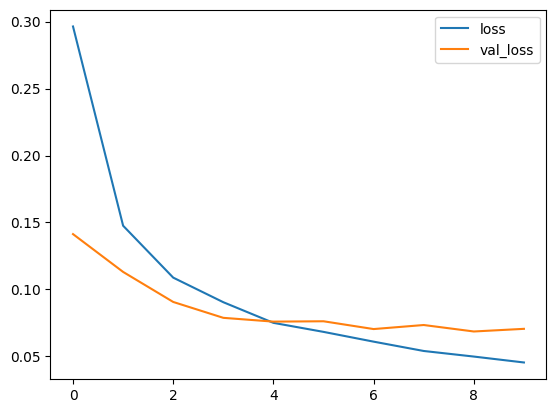

In [10]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

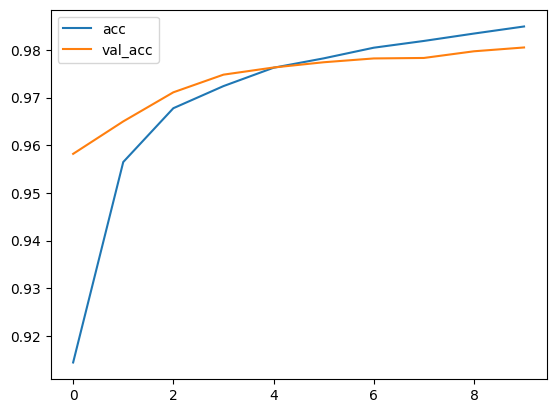

In [11]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [12]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 4ms/step - loss: 0.0706 - accuracy: 0.9805
[0.07056255638599396, 0.9804999828338623]


313/313 [==============================] - 1s 2ms/step
Confusion matrix without normalization
[[ 972    0    1    0    0    1    2    0    2    2]
 [   0 1128    3    0    0    0    2    0    2    0]
 [   4    2 1015    2    1    0    1    3    2    2]
 [   1    1    3  996    0    3    0    3    3    0]
 [   1    0    3    0  958    0    3    2    2   13]
 [   2    1    0   12    2  870    2    0    1    2]
 [   8    3    2    1    3    5  934    0    2    0]
 [   3    4    7    2    2    0    0 1005    1    4]
 [   7    1    3    5    2    6    4    4  937    5]
 [   1    2    0    4    5    3    0    3    1  990]]


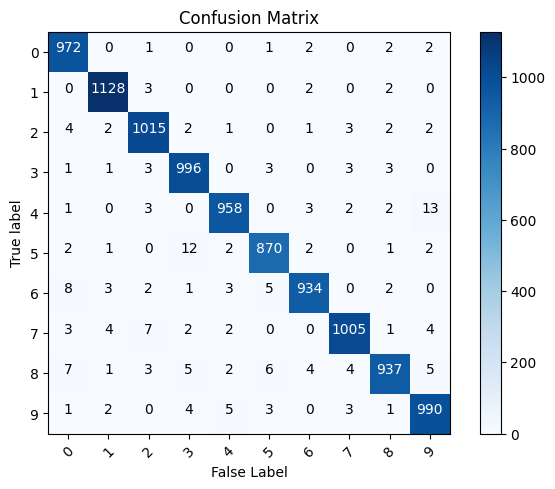

In [15]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt='.2f' if normalize else 'd'
  thresh=cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment='center',
    color="white" if cm[i, j]>thresh else "black")

  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("False Label")
  plt.show()

p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True Label: 8, Predicted Test: 0')

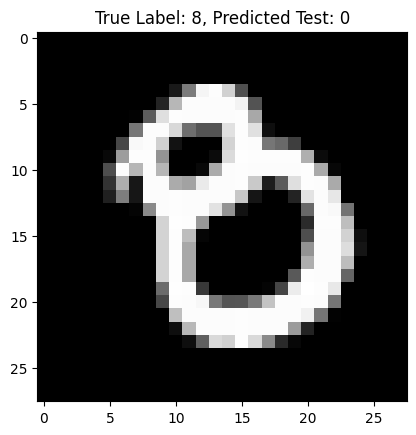

In [25]:
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title(f'True Label: {y_test[i]}, Predicted Test: {p_test[i]}')